In [1]:
import numpy as np
import struct
from array import array
from os.path  import join
import matplotlib.pyplot as plt
import umap # conda install -c conda-forge umap-learn

from sklearn import decomposition, manifold
import matplotlib.cm as cm

# For more examples:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods

In [2]:
# Read "MNIST Dataset"
# Adapted from https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
# We don't need test images (we also don't need labels, but we'll keep them)

class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        return (x_train, y_train)

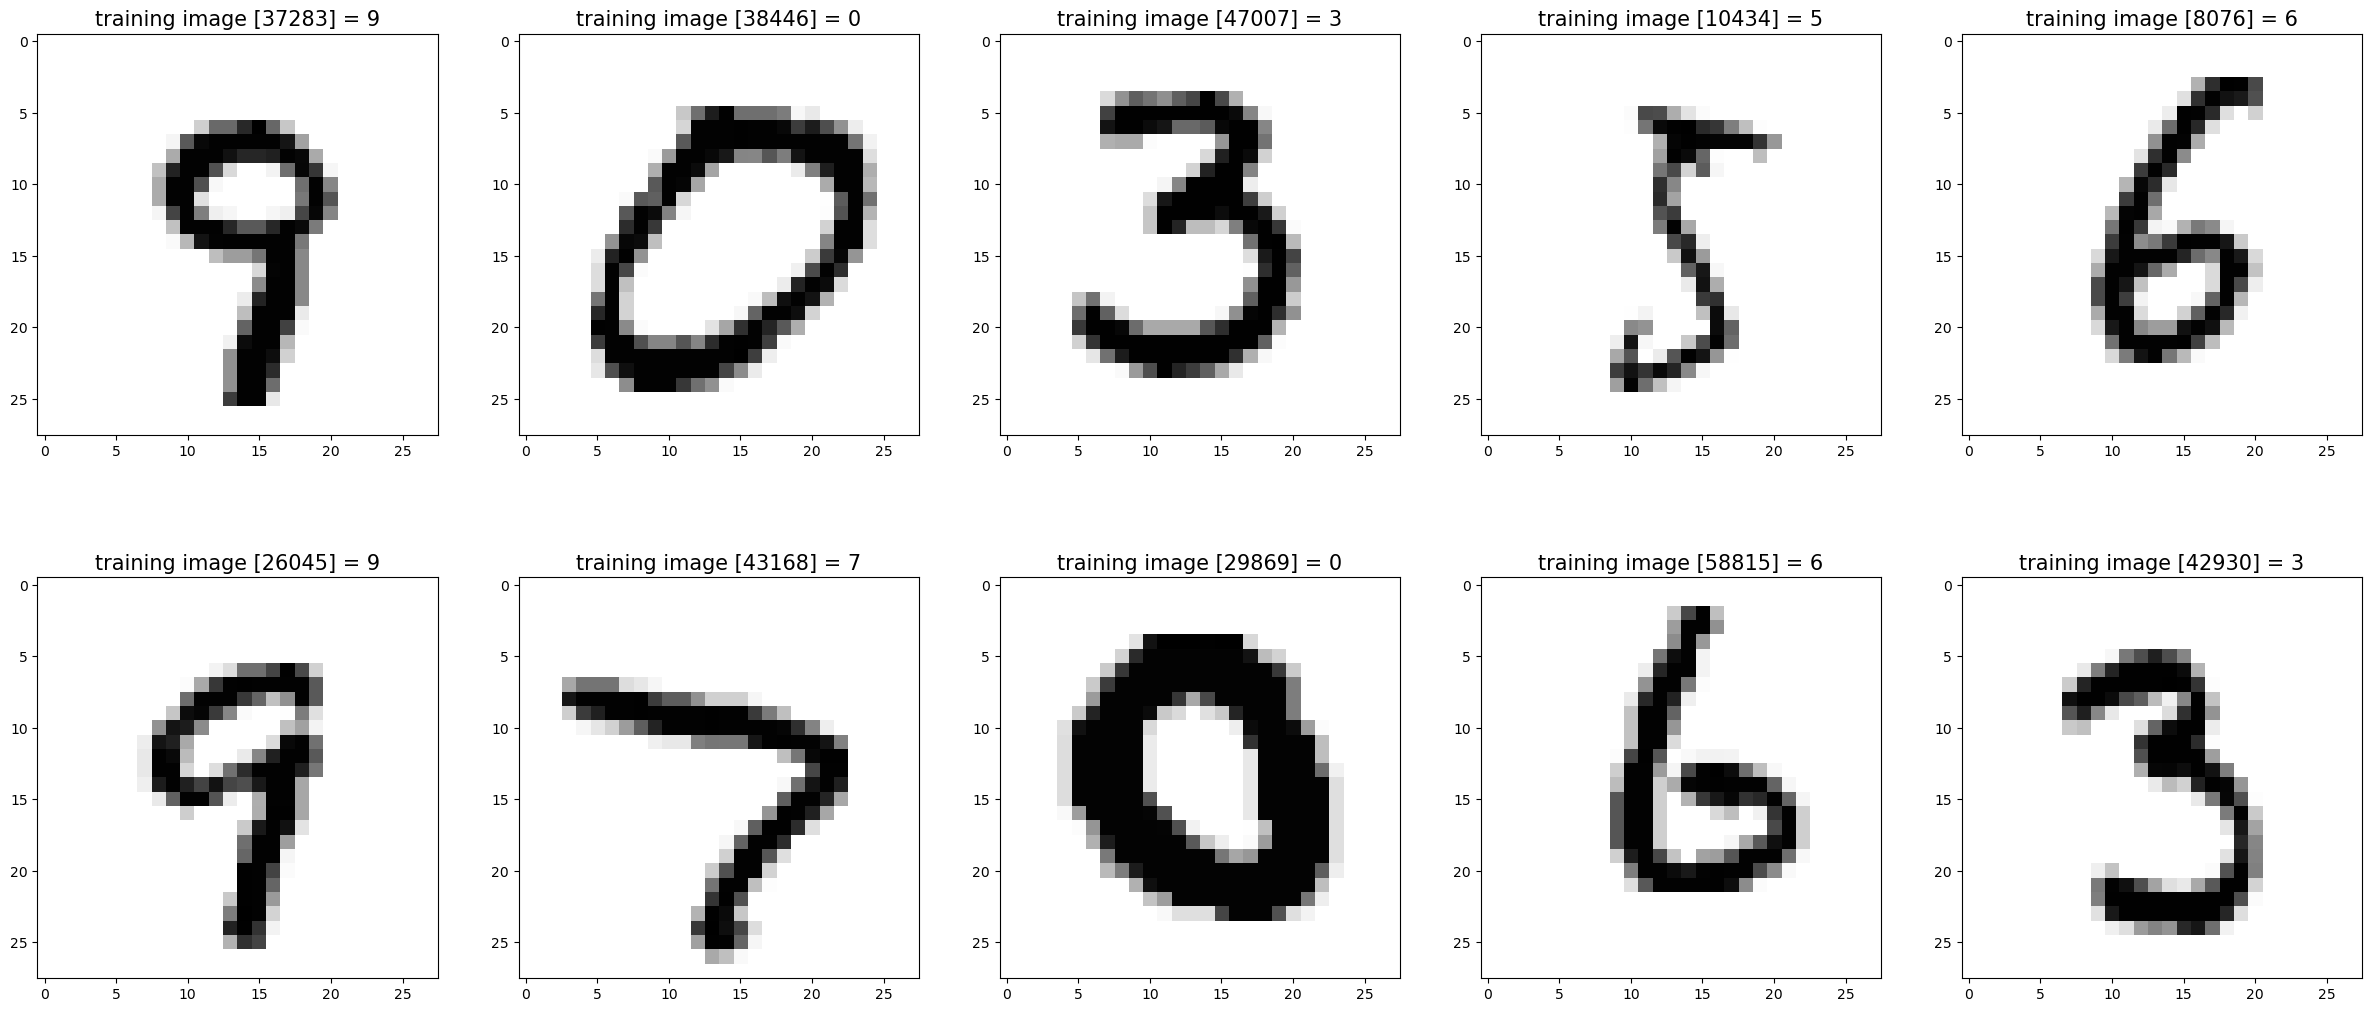

In [3]:
# Adapted from https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow([255 - z for z in image], cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

        
mnist_dataloader = MnistDataloader('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')
(x, y) = mnist_dataloader.load_data()


np.random.seed(151123)
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = np.random.randint(1, 60000)
    images_2_show.append(x[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
x = np.array([np.array(z).flatten() / 255 for z in x])
x = x[:5000, :] # Smaller dataset, so the code runs faster
y = y[:5000]
(n, J) = x.shape

In [5]:
# Standardise
x_scaled = (x - np.repeat(x.mean(axis=1), J).reshape(n, J)) / np.repeat(x.std(axis=1), J).reshape(n, J)

In [6]:
# Pick two random dimensions to project onto
d1 = 5 * 28 + 14
d2 = 20 * 28 + 9

Text(0, 0.5, 'x569')

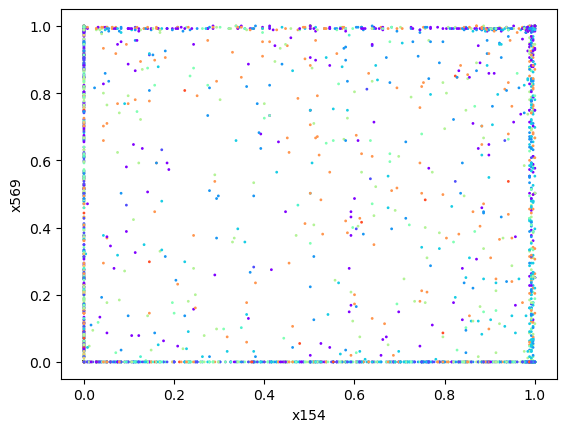

In [7]:
plt.scatter(
    x[:, d1],
    x[:, d2],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('x' + str(d1))
plt.ylabel('x' + str(d2))

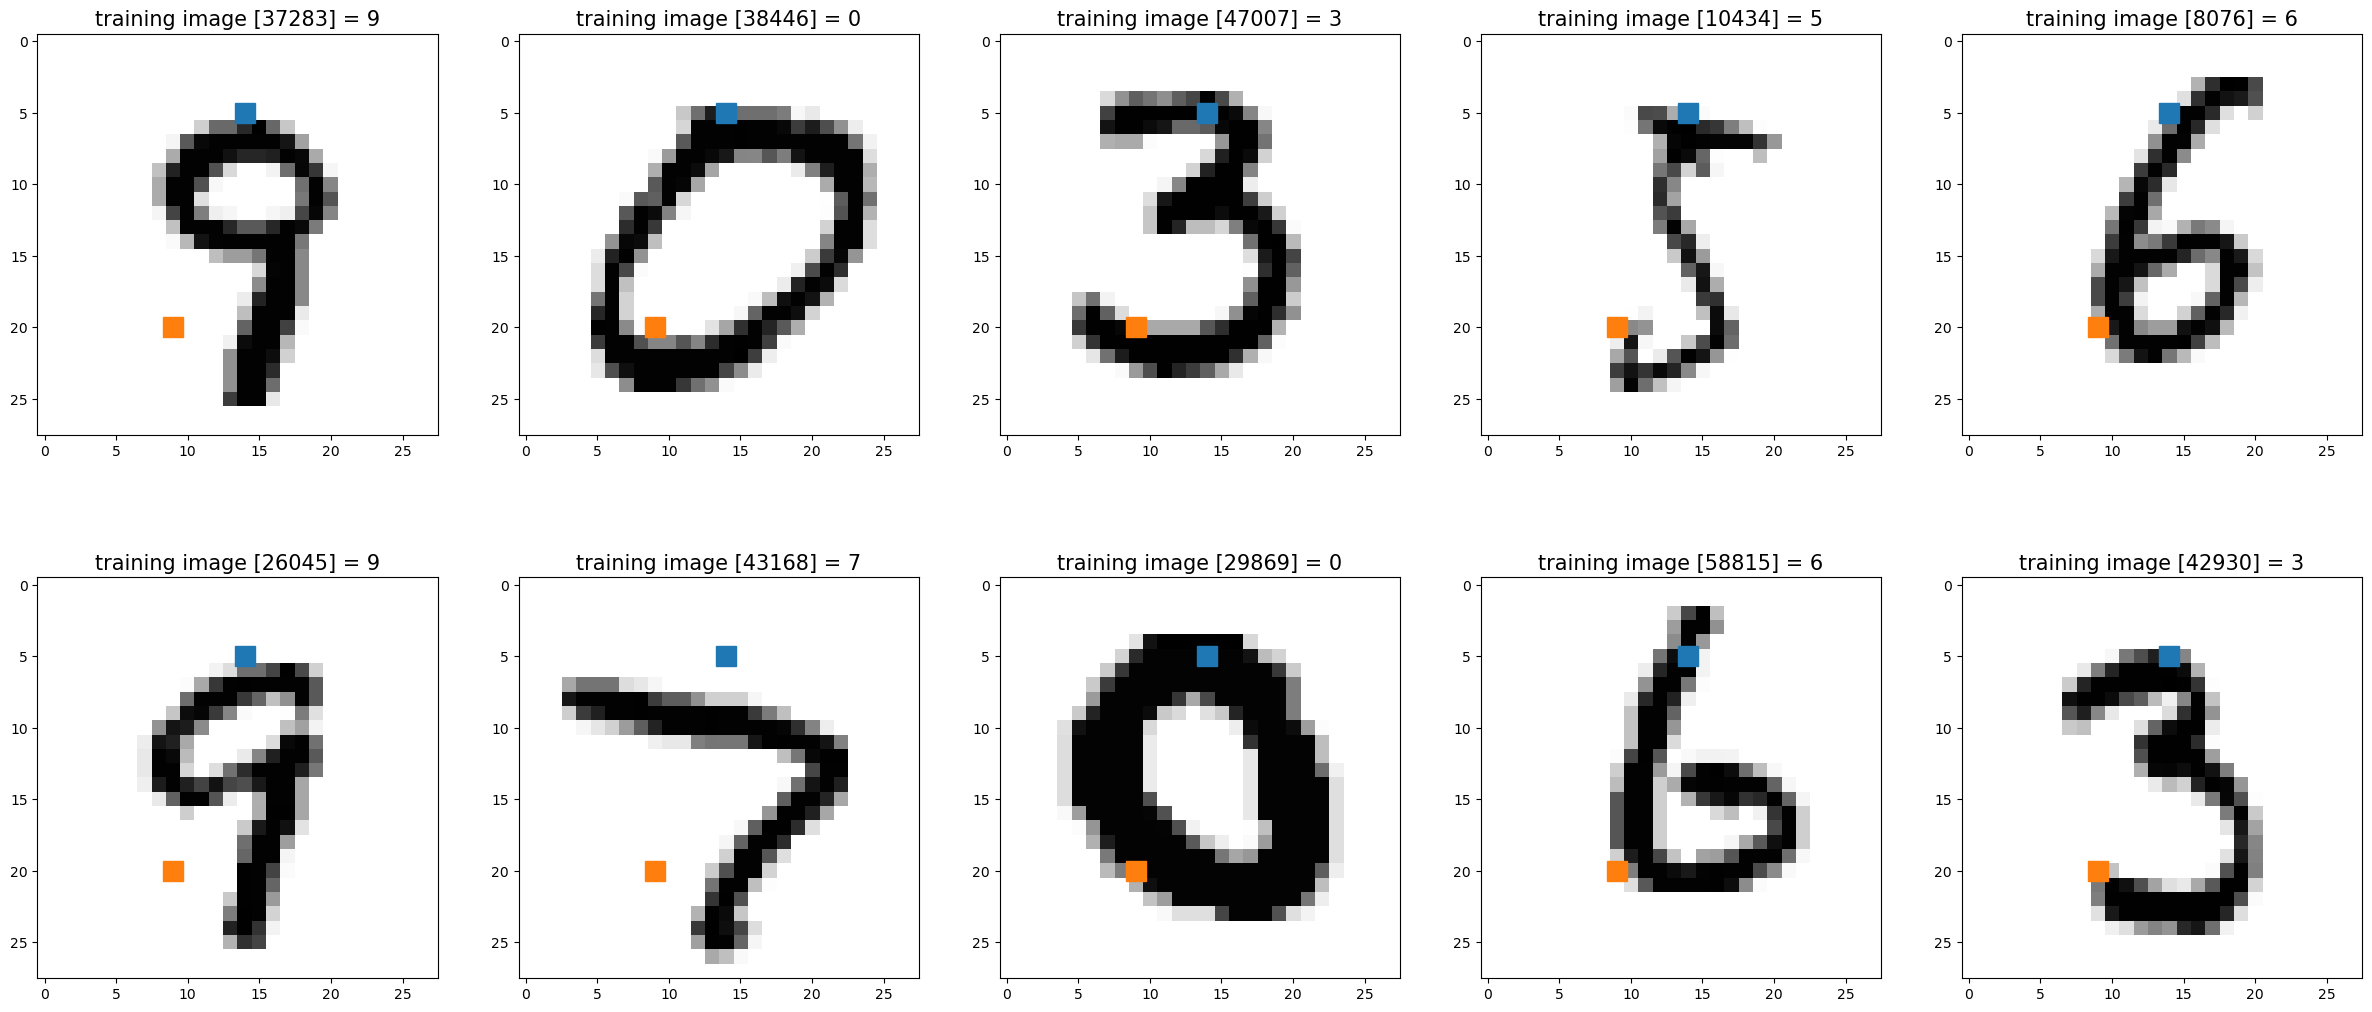

In [8]:
# Adapted from https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow([255 - z for z in image], cmap=plt.cm.gray)
        plt.plot(d1 % 28, d1 // 28, 's', ms=15)
        plt.plot(d2 % 28, d2 // 28, 's', ms=15)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


# Added squares are the dimensions from above
show_images(images_2_show, titles_2_show)

In [9]:
# PCA
pca = decomposition.PCA(n_components=2)
x_pca = pca.fit(x_scaled)

Text(0, 0.5, 'PC2')

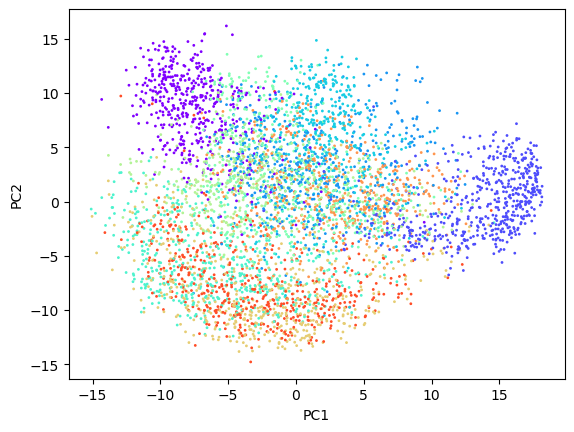

In [10]:
plt.scatter(
    x_pca.transform(x_scaled)[:, 0],
    x_pca.transform(x_scaled)[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [11]:
# Kernel PCA
kpca = decomposition.KernelPCA(n_components=2, kernel='poly')
x_kpca = kpca.fit(x)

Text(0, 0.5, 'KPC2')

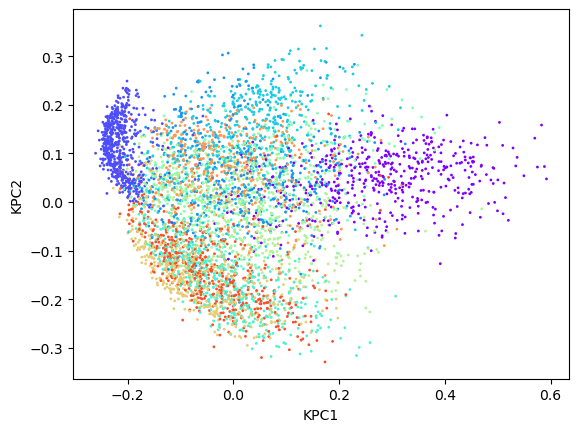

In [12]:
plt.scatter(
    x_kpca.transform(x)[:, 0],
    x_kpca.transform(x)[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('KPC1')
plt.ylabel('KPC2')

In [13]:
# Multidimensional scaling
mds = manifold.MDS(
    n_components=2,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False)
x_mds = mds.fit_transform(x)

Text(0, 0.5, 'MDS2')

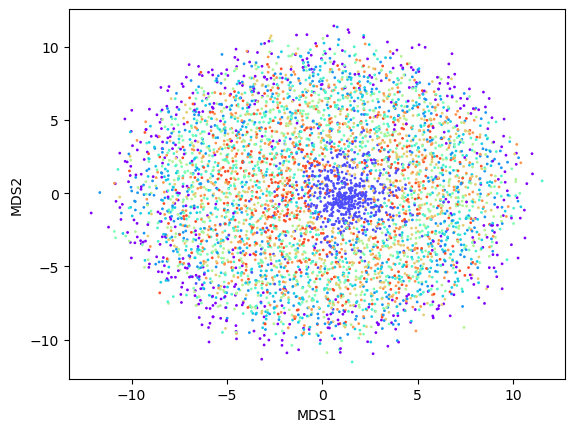

In [14]:
plt.scatter(
    x_mds[:, 0],
    x_mds[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('MDS1')
plt.ylabel('MDS2')

In [15]:
# Sammon mapping
# See https://github.com/tompollard/sammon

In [16]:
# Isomap
isomap = manifold.Isomap(n_neighbors=12, n_components=2, p=1)
x_isomap = isomap.fit_transform(x)

Text(0, 0.5, 'Isomap2')

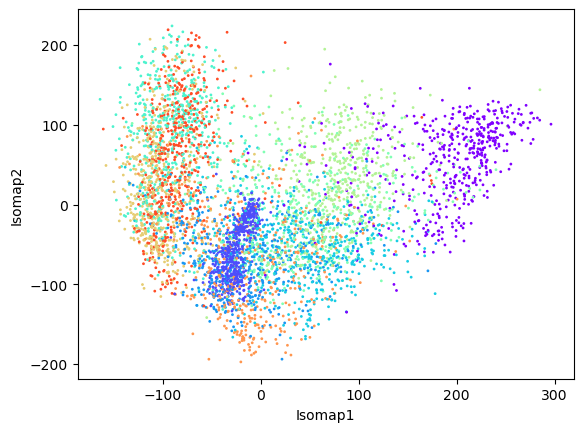

In [17]:
plt.scatter(
    x_isomap[:, 0],
    x_isomap[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')

In [18]:
# t-SNE
tsne = manifold.TSNE(
    n_components=2,
    perplexity=10,
    init="random",
    n_iter=250,
    random_state=0)
x_tsne = tsne.fit_transform(x)

Text(0, 0.5, 't-SNE2')

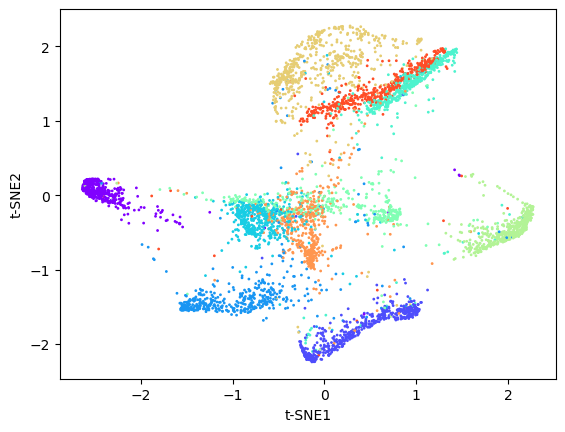

In [19]:
plt.scatter(
    x_tsne[:, 0],
    x_tsne[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

In [20]:
# UMAP
umapper = umap.UMAP()
x_umap = umapper.fit_transform(x)

Text(0, 0.5, 'UMAP2')

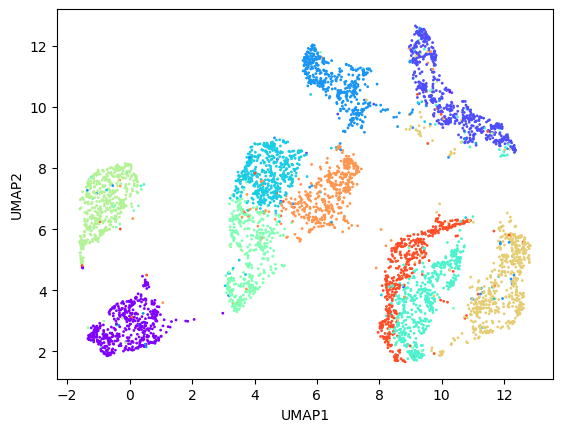

In [21]:
plt.scatter(
    x_umap[:, 0],
    x_umap[:, 1],
    c=cm.rainbow(np.array(y) / 10), s=1)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')